In [1]:
import ect
from ect_optim import ECTAngularSNF
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/10
ect_offset = radius/5

n_knots = 18

In [2]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return np.abs(x)/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [3]:
opt = ECTAngularSNF(
    image_path = "../sample_imgs/white.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y),
)

result = opt.optim()
# result = opt.optim(method = "Nelder-Mead")
# solution = result['x'][0]


Current loss=-8.117
Current loss=-9.034
Current loss=-10.357
Current loss=-11.541
Current loss=-12.984
Current loss=-14.401
Current loss=-14.799
Current loss=-15.125
Current loss=-15.563
Current loss=-16.011
Current loss=-16.241
Current loss=-16.373
Current loss=-16.597
Current loss=-16.921
Current loss=-17.110
Current loss=-17.195
Current loss=-17.304
Current loss=-17.427
Current loss=-17.601
Current loss=-17.820
Current loss=-17.870
Current loss=-17.942
Current loss=-17.962
Current loss=-17.993
Current loss=-18.019
Current loss=-18.029
Current loss=-18.030
Current loss=-18.032
Current loss=-18.034
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035
Current loss=-18.035


In [4]:
result

      fun: -18.034705257972146
 hess_inv: array([[ 9.80597133e-01,  7.36861271e-02,  2.04639207e-02,
        -2.17483886e-02,  2.29685000e-03, -1.66486769e-02,
        -8.73428396e-03, -1.45015884e-02, -1.43318935e-02,
        -1.92423979e-02, -1.53898763e-02, -2.20994833e-02,
        -1.92382330e-02, -2.26599154e-02, -1.84505497e-02,
        -2.59436858e-02, -2.12968498e-02, -2.94802648e-02],
       [ 7.36861271e-02,  1.74469194e-02,  5.50149987e-04,
        -1.77063844e-03, -2.71143306e-03, -3.28619954e-03,
        -3.97932035e-03, -3.86343910e-03, -5.66277580e-03,
        -5.40327567e-03, -4.82110781e-03, -6.47202082e-03,
        -6.61369295e-03, -6.80130107e-03, -6.90272252e-03,
        -7.89497606e-03, -6.74966163e-03, -8.72201527e-03],
       [ 2.04639207e-02,  5.50149987e-04,  6.88929889e-03,
        -4.38332723e-03, -2.60585712e-03, -5.36172203e-03,
        -5.05650776e-03, -6.17147140e-03, -6.50490381e-03,
        -7.58563338e-03, -8.19195586e-03, -8.50667003e-03,
        -9.1

opt.loss(solution)=-18.034705257972146


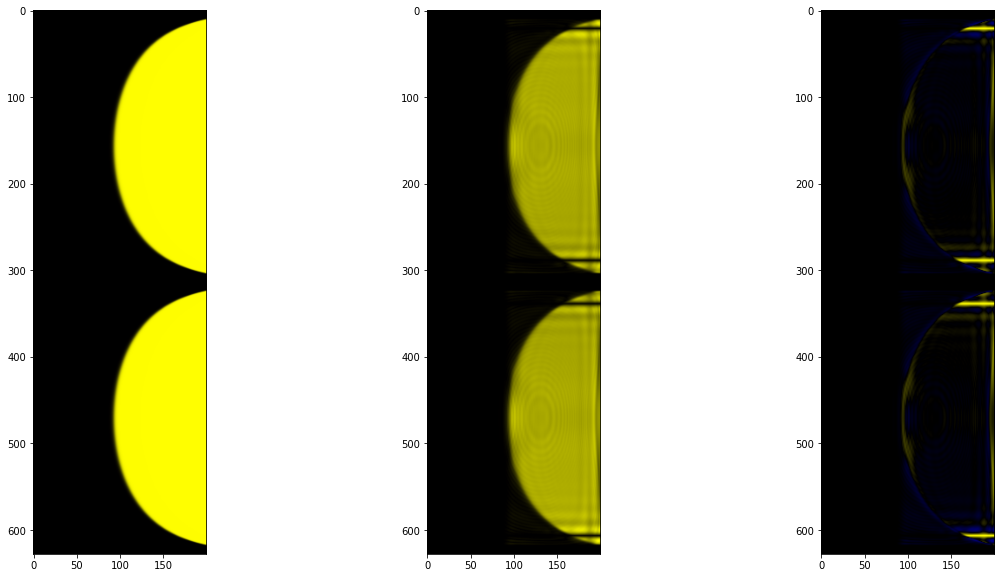

In [5]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [6]:
res = opt.inv

knots_angle = solution
# knots_space = solution[n_knots:]

ang = ect.angular_filter(res.shape[:2], knots_angle)
# snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_angle=}")

knots_angle=array([-0.3746065 , -0.12072659, -0.18169985,  0.3136041 ,  0.33606093,
        0.4668749 ,  0.51303767,  0.60420564,  0.66175608,  0.73130597,
        0.78710437,  0.84246012,  0.89012504,  0.93810703,  0.97667265,
        0.99888193,  1.00770583,  1.00178803])


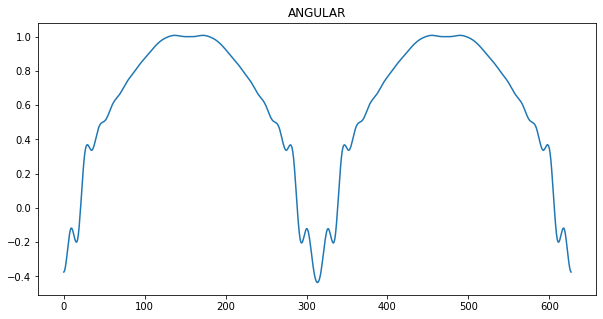

In [7]:
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
plt.title("ANGULAR")
plt.plot(ang[:,10])

# plt.subplot(1, 2, 2)
# plt.title("SNF")
# plt.plot(snf[0,:])

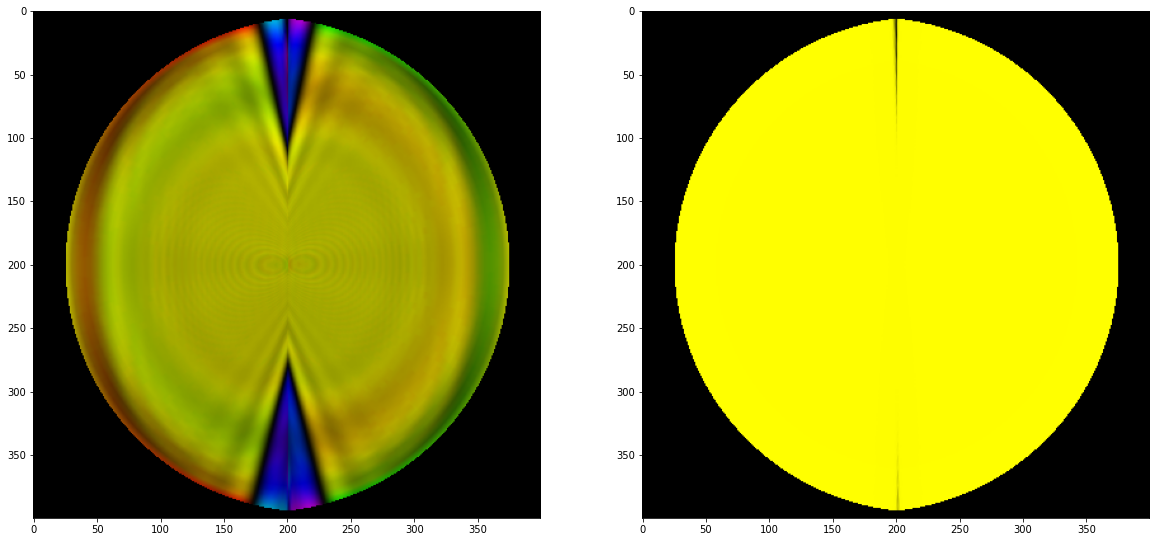

In [8]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)